## Compare the results

The notebook compares the results from the hello world model on the micro-controller to an analytical sine function.  
Copyright (c) U. Raich Dec. 2025  
The notebook is part of the TinyML course at the University of Cape Coast, Ghana  
It is released under the MIT license

In [1]:
import matplotlib.pyplot as plt
from numpy import sin,pi

In [3]:
try:
    mp_resultsFilename = "../esp32-s3_fh4r2/sin.txt"  # This is where the results were strored by the run.sh script
    mp_resultsFile = open(mp_resultsFilename,"r")
    mp_resultsData = mp_resultsFile.read()
    mp_resultsFile.close()
except:
    print("Could not read the microcontroller results file ",mp_resultsFilename)

We split the file on white space (space and newline) to get a list of strings with intermixed x and y values.  
This list is split into even element corresponding to the x values and odd elements: the y values. These elements are strings however. Finally we have to convert the strings to floats, which is done with the map function. map returns a map object. For this reason we put it into a list function to generate a list of float objects

In [6]:
mp_results = mp_resultsData.split()
x_values = mp_results[0::2] # take every second value starting from the first one
x_values = list(map(float, x_values)) # take every second value starting from the first one
y_values = mp_results[1::2] # take every second value starting from the second one
y_values = list(map(float, y_values)) # take every second value starting from the first one
print("Type of x values: ",type(x_values[0]),", and of y values: ",type(y_values[0]))
print("The original list: ")
print(mp_results[:16])
print("The x values:")
print(x_values[:8])
print("The y values:")
print(y_values[:8])
print("No of values: ",len(x_values))

Type of x values:  <class 'float'> , and of y values:  <class 'float'>
The original list: 
['0.006283', '0.016944', '0.012566', '0.016944', '0.018850', '0.016944', '0.025133', '0.059304', '0.031416', '0.059304', '0.037699', '0.059304', '0.043982', '0.059304', '0.050265', '0.101664']
The x values:
[0.006283, 0.012566, 0.01885, 0.025133, 0.031416, 0.037699, 0.043982, 0.050265]
The y values:
[0.016944, 0.016944, 0.016944, 0.059304, 0.059304, 0.059304, 0.059304, 0.101664]
No of values:  1000


Calculate the sine curve

In [ ]:
Get the same number of x values as we found in the micro-contoller results file

In [8]:
sin_x = [i*2*pi/len(x_values) for i in range(len(x_values))]
print(sin_x[:16])
sin_y = sin(sin_x)

[0.0, 0.006283185307179587, 0.012566370614359173, 0.01884955592153876, 0.025132741228718346, 0.031415926535897934, 0.03769911184307752, 0.0439822971502571, 0.05026548245743669, 0.05654866776461628, 0.06283185307179587, 0.06911503837897544, 0.07539822368615504, 0.08168140899333463, 0.0879645943005142, 0.09424777960769379]


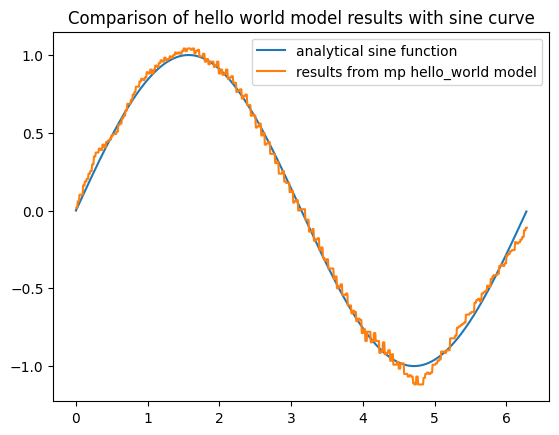

In [9]:
# See how they line up with the data
plt.clf()
plt.title("Comparison of hello world model results with sine curve")
plt.plot(sin_x,sin_y, label="analytical sine function")
plt.plot(x_values,y_values,label="results from mp hello_world model")
plt.legend()
plt.show()